# <center>Lab Sheet-3</center>
# <center>Single-Layer Perceptron and Convergence</center>

**1. Implement Perceptron Learning Algorithm from scratch (NumPy).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

def perceptron_train(X, y, eta=0.1, epochs=50):
    """Train perceptron with NumPy."""
    X_aug = np.hstack([X, np.ones((X.shape[0], 1))])  # add bias
    w = np.zeros(X_aug.shape[1])
    errors = []

    for epoch in range(epochs):
        error_count = 0
        for i in range(X_aug.shape[0]):
            yhat = 1 if np.dot(w, X_aug[i]) >= 0 else -1
            if y[i] != yhat:
                w += eta * y[i] * X_aug[i]
                error_count += 1
        errors.append(error_count)
        if error_count == 0:  # converged
            break
    return w, errors

# test on AND logic gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([-1,-1,-1,1])  # AND in bipolar form

w, errors = perceptron_train(X, y, eta=0.2, epochs=20)
print("Final weights:", w)
print("Errors per epoch:", errors)

Name: Somesh Singh
Roll Number: 233025921
Final weights: [ 0.4  0.2 -0.4]
Errors per epoch: [2, 3, 3, 0]


**2. Test convergence on a linearly separable dataset (e.g., AND/OR).** 

Name: Somesh Singh
Roll Number: 233025921


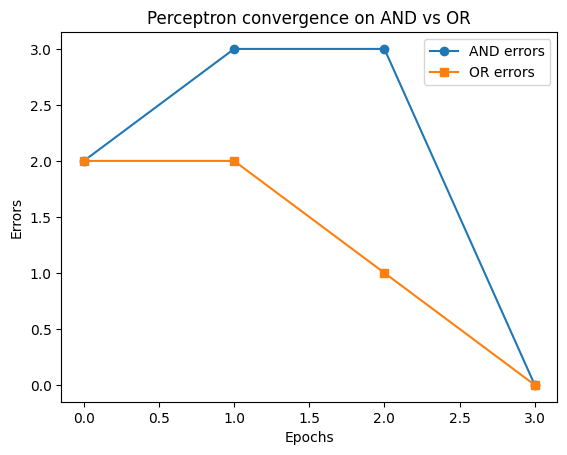

In [2]:
# OR gate
y_or = np.array([-1,1,1,1])  
w_and, err_and = perceptron_train(X, y, eta=0.2, epochs=20)
w_or, err_or = perceptron_train(X, y_or, eta=0.2, epochs=20)

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

plt.figure()
plt.plot(err_and, marker='o', label="AND errors")
plt.plot(err_or, marker='s', label="OR errors")
plt.xlabel("Epochs"); plt.ylabel("Errors"); plt.legend()
plt.title("Perceptron convergence on AND vs OR")
plt.show()

**3. Plot learning curves: number of iterations vs error rate.** 

Name: Somesh Singh
Roll Number: 233025921


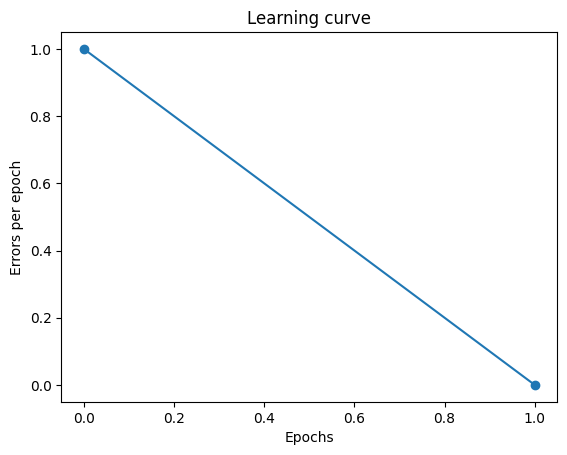

In [3]:
# random linearly separable dataset
np.random.seed(42)
X1 = np.random.randn(20,2) + np.array([2,2])
X2 = np.random.randn(20,2) + np.array([-2,-2])
X = np.vstack([X1,X2])
y = np.hstack([np.ones(20), -np.ones(20)])

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

w, errors = perceptron_train(X, y, eta=0.1, epochs=50)

plt.figure()
plt.plot(errors, marker='o')
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Errors per epoch")
plt.show()

**4. Demonstrate the Perceptron Convergence Theorem on synthetic data.** 

Name: Somesh Singh
Roll Number: 233025921


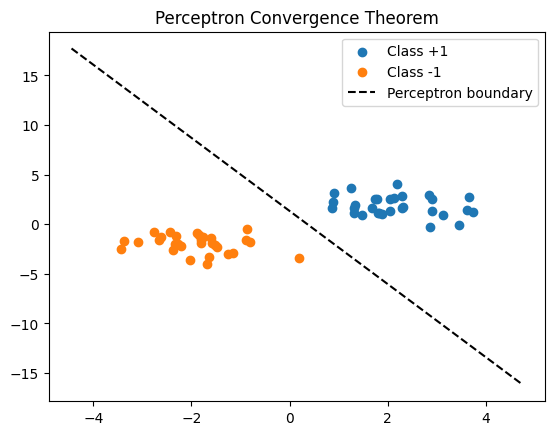

Converged in 2 epochs, with final errors: 0


In [4]:
# Generate linearly separable data
np.random.seed(1)
X1 = np.random.randn(30,2) + np.array([2,2])
X2 = np.random.randn(30,2) + np.array([-2,-2])
X = np.vstack([X1,X2])
y = np.hstack([np.ones(30), -np.ones(30)])

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

w, errors = perceptron_train(X, y, eta=0.1, epochs=100)

# plot decision boundary
plt.figure()
plt.scatter(X1[:,0], X1[:,1], label="Class +1")
plt.scatter(X2[:,0], X2[:,1], label="Class -1")

xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
ys = -(w[0]*xs + w[2]) / w[1]
plt.plot(xs, ys, 'k--', label="Perceptron boundary")

plt.legend(); plt.title("Perceptron Convergence Theorem")
plt.show()

print("Converged in", len(errors), "epochs, with final errors:", errors[-1])

**5. Compare perceptron decision boundary with Bayesian classifier (Gaussian assumption).**

Name: Somesh Singh
Roll Number: 233025921


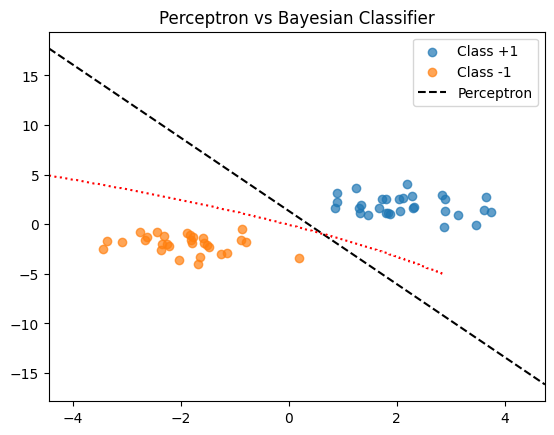

In [5]:
from sklearn.naive_bayes import GaussianNB

# reuse synthetic dataset
X = np.vstack([X1,X2])
y = np.hstack([np.ones(30), -np.ones(30)])

# Print the name and roll number
print("Name: Somesh Singh")
print("Roll Number: 233025921")

# train perceptron
w, _ = perceptron_train(X, y, eta=0.1, epochs=100)

# train Gaussian Bayes
clf = GaussianNB()
clf.fit(X, y)

# plot
plt.figure()
plt.scatter(X1[:,0], X1[:,1], label="Class +1", alpha=0.7)
plt.scatter(X2[:,0], X2[:,1], label="Class -1", alpha=0.7)

# perceptron boundary
xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
ys = -(w[0]*xs + w[2]) / w[1]
plt.plot(xs, ys, 'k--', label="Perceptron")

# Bayesian boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors="r", linestyles=":")

plt.legend(); plt.title("Perceptron vs Bayesian Classifier")
plt.show()